 #### <p>&#127773; <font color="Black"> Importing all the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

In [2]:
matches = pd.read_csv(r'C:\Users\91946\Downloads\matches.csv')
deliveries = pd.read_csv(r'C:\Users\91946\Downloads\deliveries.csv')
teamwise_data = pd.read_csv(r'C:\Users\91946\Downloads\teamwise_home_and_away.csv')
strikerate = pd.read_csv(r'C:\Users\91946\Downloads\most_runs_average_strikerate.csv')
player = pd.read_excel(r'C:\Users\91946\Downloads\Players.xlsx')
teams = pd.read_csv(r'C:\Users\91946\Downloads\teams.csv')

## Inspecting the datasets

In [3]:
matches.head(3)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN


In [4]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [5]:
deliveries.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [6]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [7]:
teamwise_data.head()

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,Rising Pune Supergiant,5,5,8,8,62.500000,62.500000
1,Mumbai Indians,58,51,101,86,57.425743,59.302326
2,Chennai Super Kings,51,49,89,75,57.303371,65.333333
3,Delhi Capitals,3,7,6,10,50.000000,70.000000
4,Sunrisers Hyderabad,30,28,63,45,47.619048,62.222222


In [8]:
teamwise_data.shape

(14, 7)

In [9]:
teamwise_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 14 non-null     object 
 1   home_wins            14 non-null     int64  
 2   away_wins            14 non-null     int64  
 3   home_matches         14 non-null     int64  
 4   away_matches         14 non-null     int64  
 5   home_win_percentage  14 non-null     float64
 6   away_win_percentage  14 non-null     float64
dtypes: float64(2), int64(4), object(1)
memory usage: 912.0+ bytes


In [10]:
strikerate.head()

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881


In [11]:
strikerate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   batsman        516 non-null    object 
 1   total_runs     516 non-null    int64  
 2   out            516 non-null    int64  
 3   numberofballs  516 non-null    int64  
 4   average        482 non-null    float64
 5   strikerate     516 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 24.3+ KB


In [12]:
strikerate.describe

<bound method NDFrame.describe of             batsman  total_runs  out  numberofballs    average  strikerate
0           V Kohli        5426  152           4111  35.697368  131.987351
1          SK Raina        5386  160           3916  33.662500  137.538304
2         RG Sharma        4902  161           3742  30.447205  130.999466
3         DA Warner        4717  114           3292  41.377193  143.286756
4          S Dhawan        4601  137           3665  33.583942  125.538881
..              ...         ...  ...            ...        ...         ...
511        ND Doshi           0    1             13   0.000000    0.000000
512         J Denly           0    1              1   0.000000    0.000000
513         S Ladda           0    2              9   0.000000    0.000000
514  V Pratap Singh           0    1              1   0.000000    0.000000
515       S Kaushik           0    1              1   0.000000    0.000000

[516 rows x 6 columns]>

In [13]:
player.head()

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
0,A Ashish Reddy,1991-02-24,Right_Hand,Right-arm medium,India
1,A Chandila,1983-12-05,Right_Hand,Right-arm offbreak,India
2,A Chopra,1977-09-19,Right_Hand,Right-arm offbreak,India
3,A Choudhary,NaT,Right_hand,Left-arm fast-medium,NaN
4,A Dananjaya,NaT,Right_Hand,Right-arm offbreak,NaN


In [14]:
player.describe

<bound method NDFrame.describe of         Player_Name        DOB Batting_Hand           Bowling_Skill   Country
0    A Ashish Reddy 1991-02-24   Right_Hand        Right-arm medium     India
1        A Chandila 1983-12-05   Right_Hand      Right-arm offbreak     India
2          A Chopra 1977-09-19   Right_Hand      Right-arm offbreak     India
3       A Choudhary        NaT   Right_hand    Left-arm fast-medium       NaN
4       A Dananjaya        NaT   Right_Hand      Right-arm offbreak       NaN
..              ...        ...          ...                     ...       ...
561     Younis Khan 1977-11-29   Right_Hand        Right-arm medium  Pakistan
562       YS Chahal 1990-07-23   Right_Hand         Legbreak googly     India
563    Yuvraj Singh 1981-12-12    Left_Hand  Slow left-arm orthodox     India
564     YV Takawale 1984-11-05   Right_Hand                     NaN     India
565          Z Khan 1978-10-07   Right_Hand    Left-arm fast-medium     India

[566 rows x 5 columns]>

In [15]:
teams.head()

,team1
0,Pune Warriors
1,Kolkata Knight Riders
2,Rajasthan Royals
3,Kochi Tuskers Kerala
4,Gujarat Lions


In [16]:
teams.describe

<bound method NDFrame.describe of                           team1
0                 Pune Warriors
1         Kolkata Knight Riders
2              Rajasthan Royals
3          Kochi Tuskers Kerala
4                 Gujarat Lions
5           Chennai Super Kings
6       Rising Pune Supergiants
7              Delhi Daredevils
8               Deccan Chargers
9                Delhi Capitals
10               Mumbai Indians
11          Sunrisers Hyderabad
12       Rising Pune Supergiant
13  Royal Challengers Bangalore
14              Kings XI Punjab>

In [17]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   team1   15 non-null     object
dtypes: object(1)
memory usage: 248.0+ bytes


# Data Cleaning

### 1. Cleaning deliveries dataset

In [18]:
(deliveries.isnull().sum(axis=1)/len(deliveries)) * 100   ## percentage value is very small so neglect it

0         0.001675
1         0.001675
2         0.001675
3         0.001675
4         0.001675
            ...   
179073    0.001675
179074    0.001675
179075    0.000000
179076    0.001675
179077    0.000558
Length: 179078, dtype: float64

In [19]:
(deliveries.isnull().sum()/len(deliveries)) * 100  # last 3 columns have 95%, 95% and 96% null values

match_id             0.000000
inning               0.000000
batting_team         0.000000
bowling_team         0.000000
over                 0.000000
ball                 0.000000
batsman              0.000000
non_striker          0.000000
bowler               0.000000
is_super_over        0.000000
wide_runs            0.000000
bye_runs             0.000000
legbye_runs          0.000000
noball_runs          0.000000
penalty_runs         0.000000
batsman_runs         0.000000
extra_runs           0.000000
total_runs           0.000000
player_dismissed    95.066954
dismissal_kind      95.066954
fielder             96.399334
dtype: float64

### 2. Cleaning 'matches' dataset

In [20]:
(matches.isnull().sum(axis=1)/len(matches)) * 100   ##  percentage null value is very small so ignore them

0      0.132275
1      0.132275
2      0.132275
3      0.132275
4      0.396825
         ...   
751    0.000000
752    0.000000
753    0.396825
754    0.000000
755    0.000000
Length: 756, dtype: float64

In [21]:
## umpire3 column contains 84 percent null values
(matches.isnull().sum()/len(matches)) * 100  

id                  0.000000
Season              0.000000
city                0.925926
date                0.000000
team1               0.000000
team2               0.000000
toss_winner         0.000000
toss_decision       0.000000
result              0.000000
dl_applied          0.000000
winner              0.529101
win_by_runs         0.000000
win_by_wickets      0.000000
player_of_match     0.529101
venue               0.000000
umpire1             0.264550
umpire2             0.264550
umpire3            84.259259
dtype: float64

In [22]:
matches.drop(['umpire3'], axis=1, inplace=True)

In [23]:
(matches.isnull().sum()/len(matches)) * 100    ## now it looks fine...null value percentage is very low

id                 0.000000
Season             0.000000
city               0.925926
date               0.000000
team1              0.000000
team2              0.000000
toss_winner        0.000000
toss_decision      0.000000
result             0.000000
dl_applied         0.000000
winner             0.529101
win_by_runs        0.000000
win_by_wickets     0.000000
player_of_match    0.529101
venue              0.000000
umpire1            0.264550
umpire2            0.264550
dtype: float64

### 3. Cleaning strikerate dataset

In [25]:
(strikerate.isnull().sum(axis=1)/len(strikerate)) * 100

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
511    0.0
512    0.0
513    0.0
514    0.0
515    0.0
Length: 516, dtype: float64

In [26]:
(strikerate.isnull().sum()/len(strikerate)) * 100

batsman          0.000000
total_runs       0.000000
out              0.000000
numberofballs    0.000000
average          6.589147
strikerate       0.000000
dtype: float64

### 4. Cleaning Player dataset

In [29]:
(player.isnull().sum(axis=1)/len(player)) * 100
 #players dataset contain nearly zero percent null values which can be ignored.

0      0.000000
1      0.000000
2      0.000000
3      0.353357
4      0.353357
         ...   
561    0.000000
562    0.000000
563    0.000000
564    0.176678
565    0.000000
Length: 566, dtype: float64

In [31]:
(player.isnull().sum()/len(player)) * 100

Player_Name       0.000000
DOB              16.784452
Batting_Hand      0.530035
Bowling_Skill    11.307420
Country          16.784452
dtype: float64

#### The Remaining datasets are also cleaned


###  Total Matches played by each team

In [220]:
total_match = matches.team1.value_counts() + matches.team2.value_counts()
total_match = pd.DataFrame(total_match,columns=["total_matches_played"])
total_match = total_match.reset_index().rename({"index":"team"},axis=1)
total_match.sort_values(by=['total_matches_played'], inplace = True, ascending = False )
total_match

,team,total_matches_played
8,Mumbai Indians,187
13,Royal Challengers Bangalore,180
7,Kolkata Knight Riders,178
5,Kings XI Punjab,176
0,Chennai Super Kings,164
3,Delhi Daredevils,161
10,Rajasthan Royals,147
14,Sunrisers Hyderabad,108
1,Deccan Chargers,75
9,Pune Warriors,46


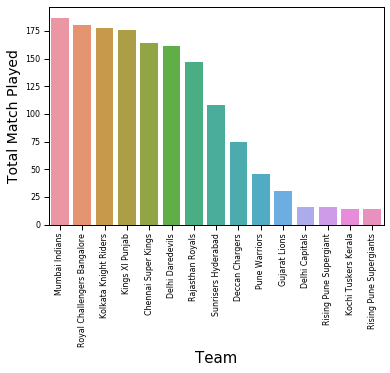

In [225]:
sns.barplot(y = total_match.total_matches_played, x = total_match.team)
plt.xlabel('Team', fontsize=15)
plt.ylabel('Total Match Played', fontsize=14)
plt.xticks(rotation=90)
plt.show()

From the above table and plot we came to know that Mumbai Indians has played the most no of matches and Rising Pune Supergiants played the least no of matches.

### Total Wins of every team

In [219]:
match_wins = matches.winner.value_counts()
match_wins = match_wins.reset_index().rename({"index":"team"},axis=1)
match_wins = match_wins.rename({"winner":"total_matches_won"},axis=1)
match_wins

,team,total_matches_won
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Rajasthan Royals,75
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Gujarat Lions,13


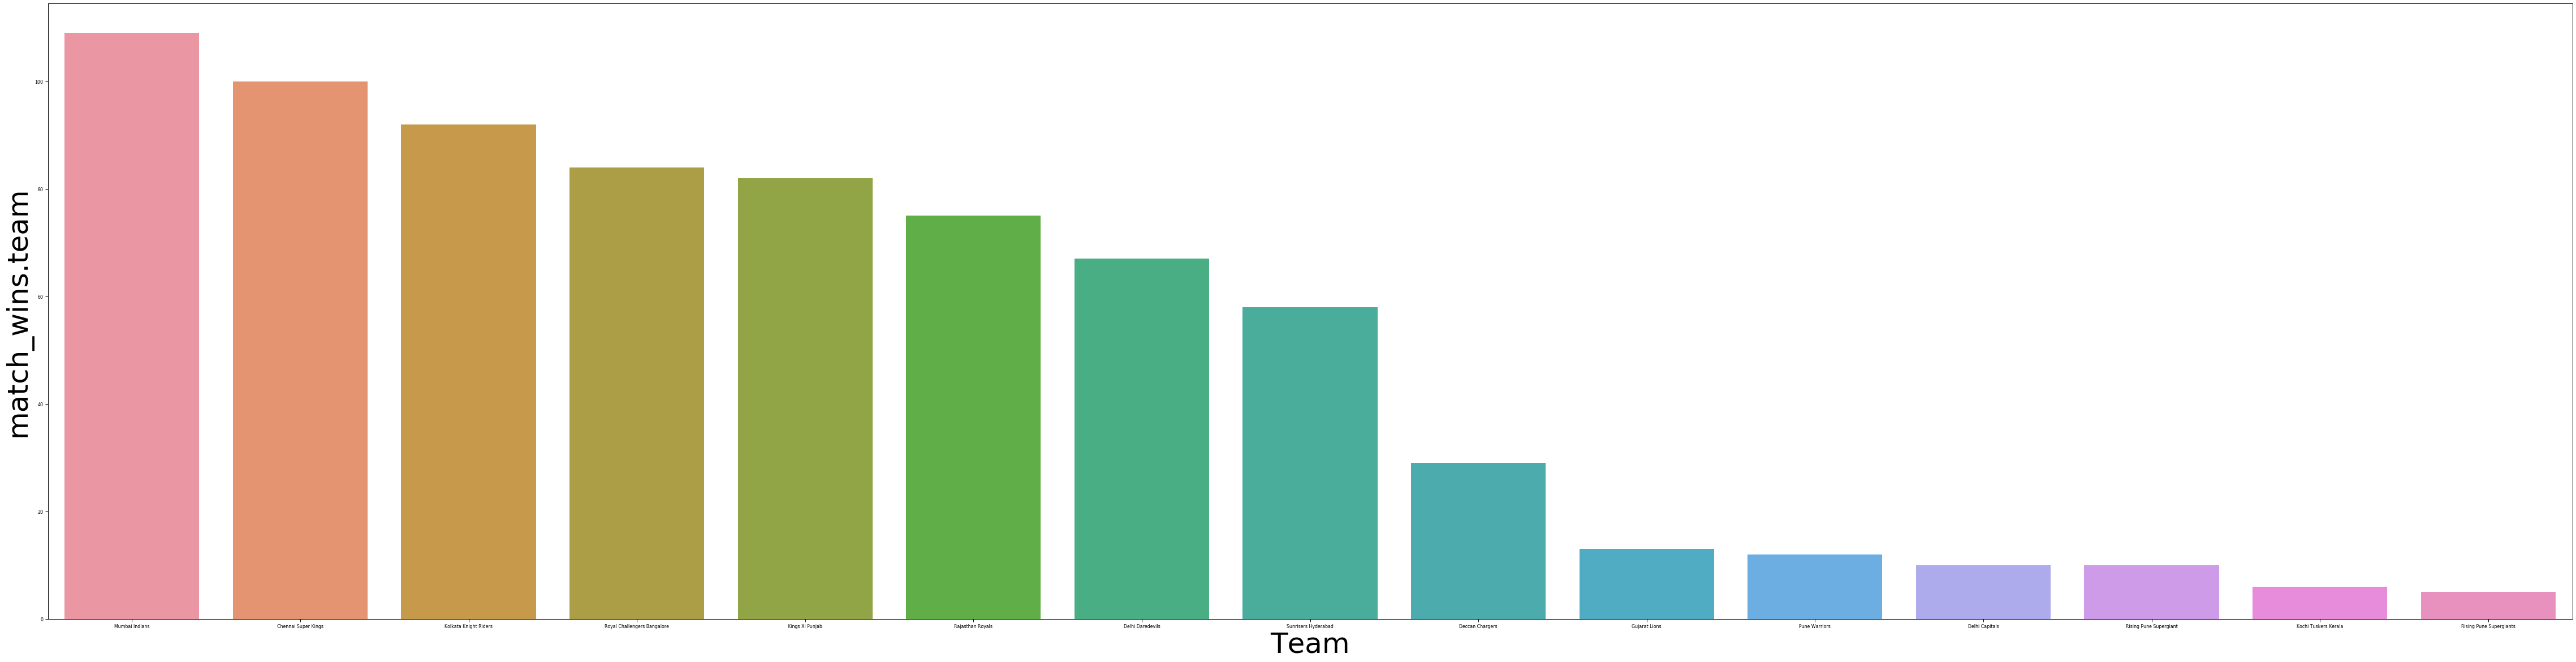

In [211]:
plt.figure(figsize=(80, 20))
sns.barplot(y = match_wins.total_matches_won, x = match_wins.team)
plt.ylabel(" match_wins.team", fontsize = 30)
plt.xlabel('Team', fontsize=50)
plt.ylabel('match_wins.team', fontsize=50)
plt.show()

 From the above table and plot we came to know that Mumbai Indias has won the most matches

### Wnning percentage of each team

In [69]:
matches_wons = matches.winner.value_counts()
total_match = matches.team1.value_counts()+matches.team2.value_counts()
win_percentage = (matches_wons/total_match)*100
win_percentage = pd.DataFrame(win_percentage,columns=["winning_percentage"])
win_percentage =  win_percentage.reset_index().rename({"index":"team"},axis=1)
win_percentage

,team,winning_percentage
0,Chennai Super Kings,60.975610
1,Deccan Chargers,38.666667
2,Delhi Capitals,62.500000
3,Delhi Daredevils,41.614907
4,Gujarat Lions,43.333333
5,Kings XI Punjab,46.590909
6,Kochi Tuskers Kerala,42.857143
7,Kolkata Knight Riders,51.685393
8,Mumbai Indians,58.288770
9,Pune Warriors,26.086957


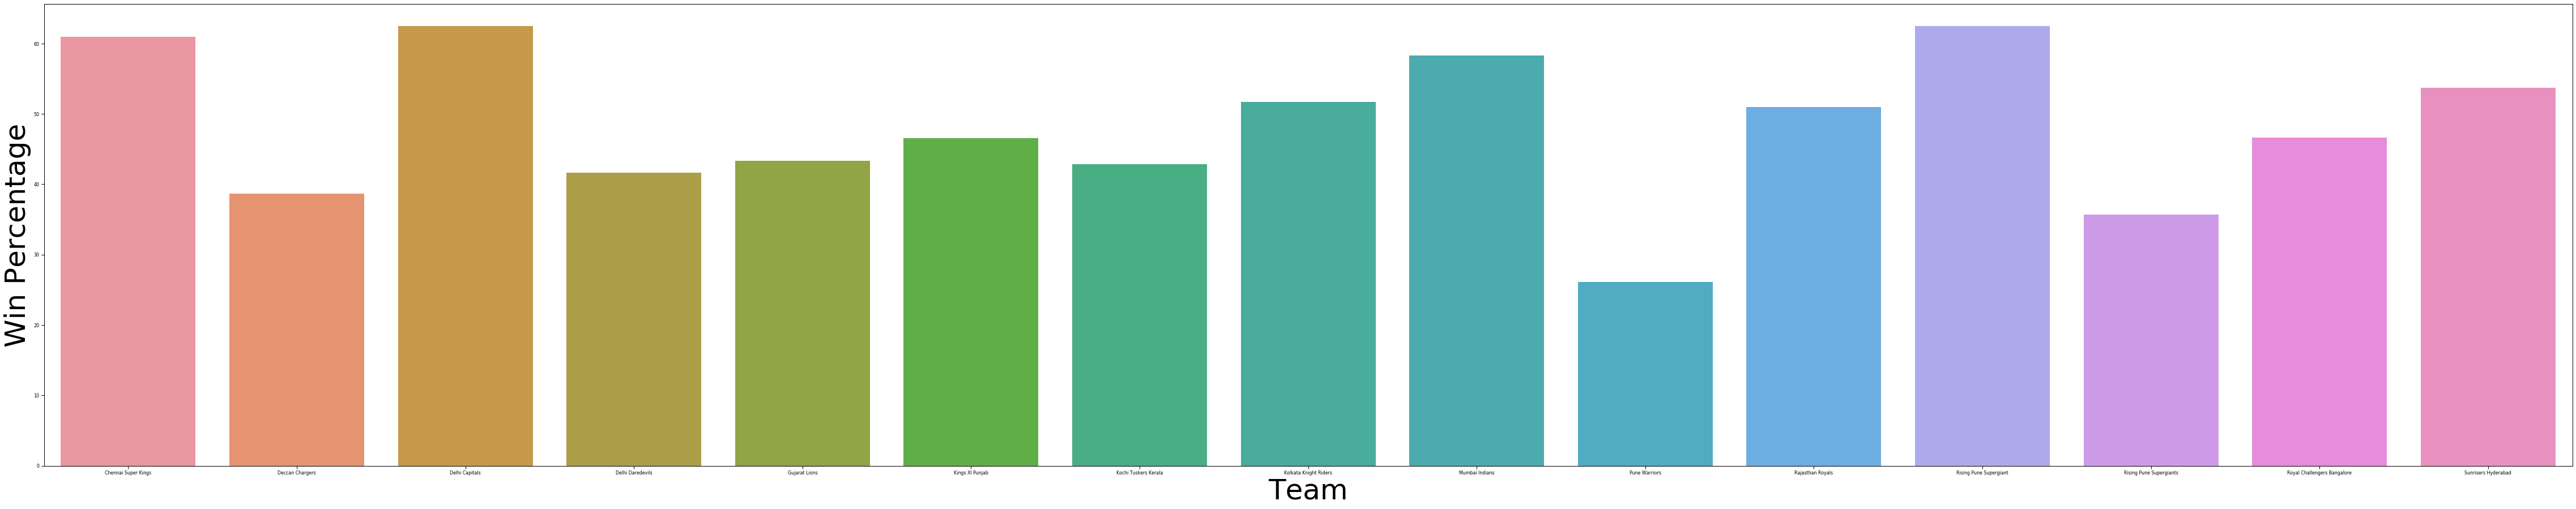

In [210]:
plt.figure(figsize=(80, 15))
sns.barplot(y = win_percentage.winning_percentage, x = win_percentage.team)
plt.xlabel('Team', fontsize=50)
plt.ylabel('Win Percentage', fontsize=50)
plt.show()

From the above table and plot we came to know that Delhi Capitals has the highest winning percentage

### Getting Top 10 cities where most matches played

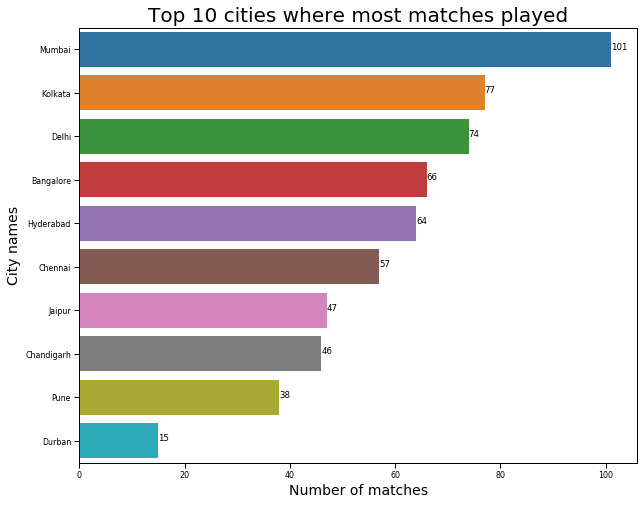

In [85]:
# plotting city with id
plt.figure(figsize=(10,8))
x = matches.groupby('city').count()['id'].sort_values(ascending=False)[:10]
sns.barplot(x.values, x.index)
plt.title('Top 10 cities where most matches played', fontsize=20)
plt.xlabel('Number of matches', fontsize=14)
plt.ylabel('City names', fontsize=14)

for index, value in enumerate(x):
    plt.text(value, index, str(value))

### Getting Top 10 stadiums where most matches played

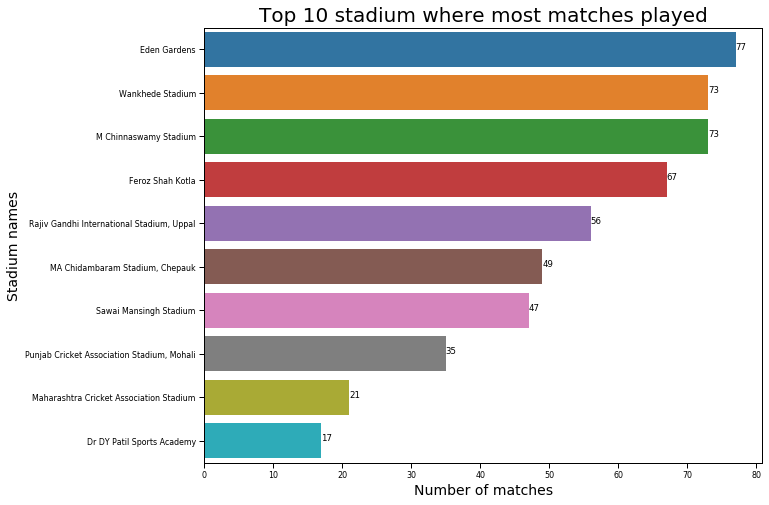

In [86]:
plt.figure(figsize=(10,8))
x = matches.groupby('venue').count()['id'].sort_values(ascending=False)[:10]
sns.barplot(x.values, x.index)
plt.title('Top 10 stadium where most matches played', fontsize=20)
plt.xlabel('Number of matches', fontsize=14)
plt.ylabel('Stadium names', fontsize=14)

for index, value in enumerate(x):
    plt.text(value, index, str(value))

### Getting Top 10 Man of the match in all matches

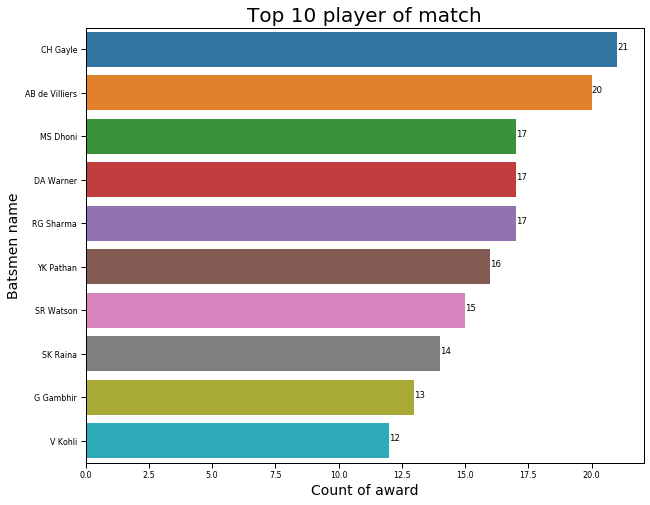

In [88]:
plt.figure(figsize=(10,8))
x = matches.groupby('player_of_match').count()['id'].sort_values(ascending=False)[:10]
sns.barplot(x.values, x.index)
plt.title('Top 10 player of match', fontsize=20)
plt.xlabel('Count of award', fontsize=14)
plt.ylabel('Batsmen name', fontsize=14)

for index, value in enumerate(x):
    plt.text(value, index, str(value))

Iqbal Abdulla is on the top of this list with average of 88 and 
Jonny Bairstow is on second position with average of 57.4.

### Most successful team in Home Condition

In [91]:
home_wins = teamwise_data[['team', 'home_win_percentage']]
home_wins.sort_values('home_win_percentage', ascending  = False)

,team,home_win_percentage
0,Rising Pune Supergiant,62.500000
1,Mumbai Indians,57.425743
2,Chennai Super Kings,57.303371
3,Delhi Capitals,50.000000
4,Sunrisers Hyderabad,47.619048
5,Rajasthan Royals,43.283582
6,Deccan Chargers,41.860465
7,Kings XI Punjab,41.758242
8,Royal Challengers Bangalore,41.176471
9,Kolkata Knight Riders,40.963855


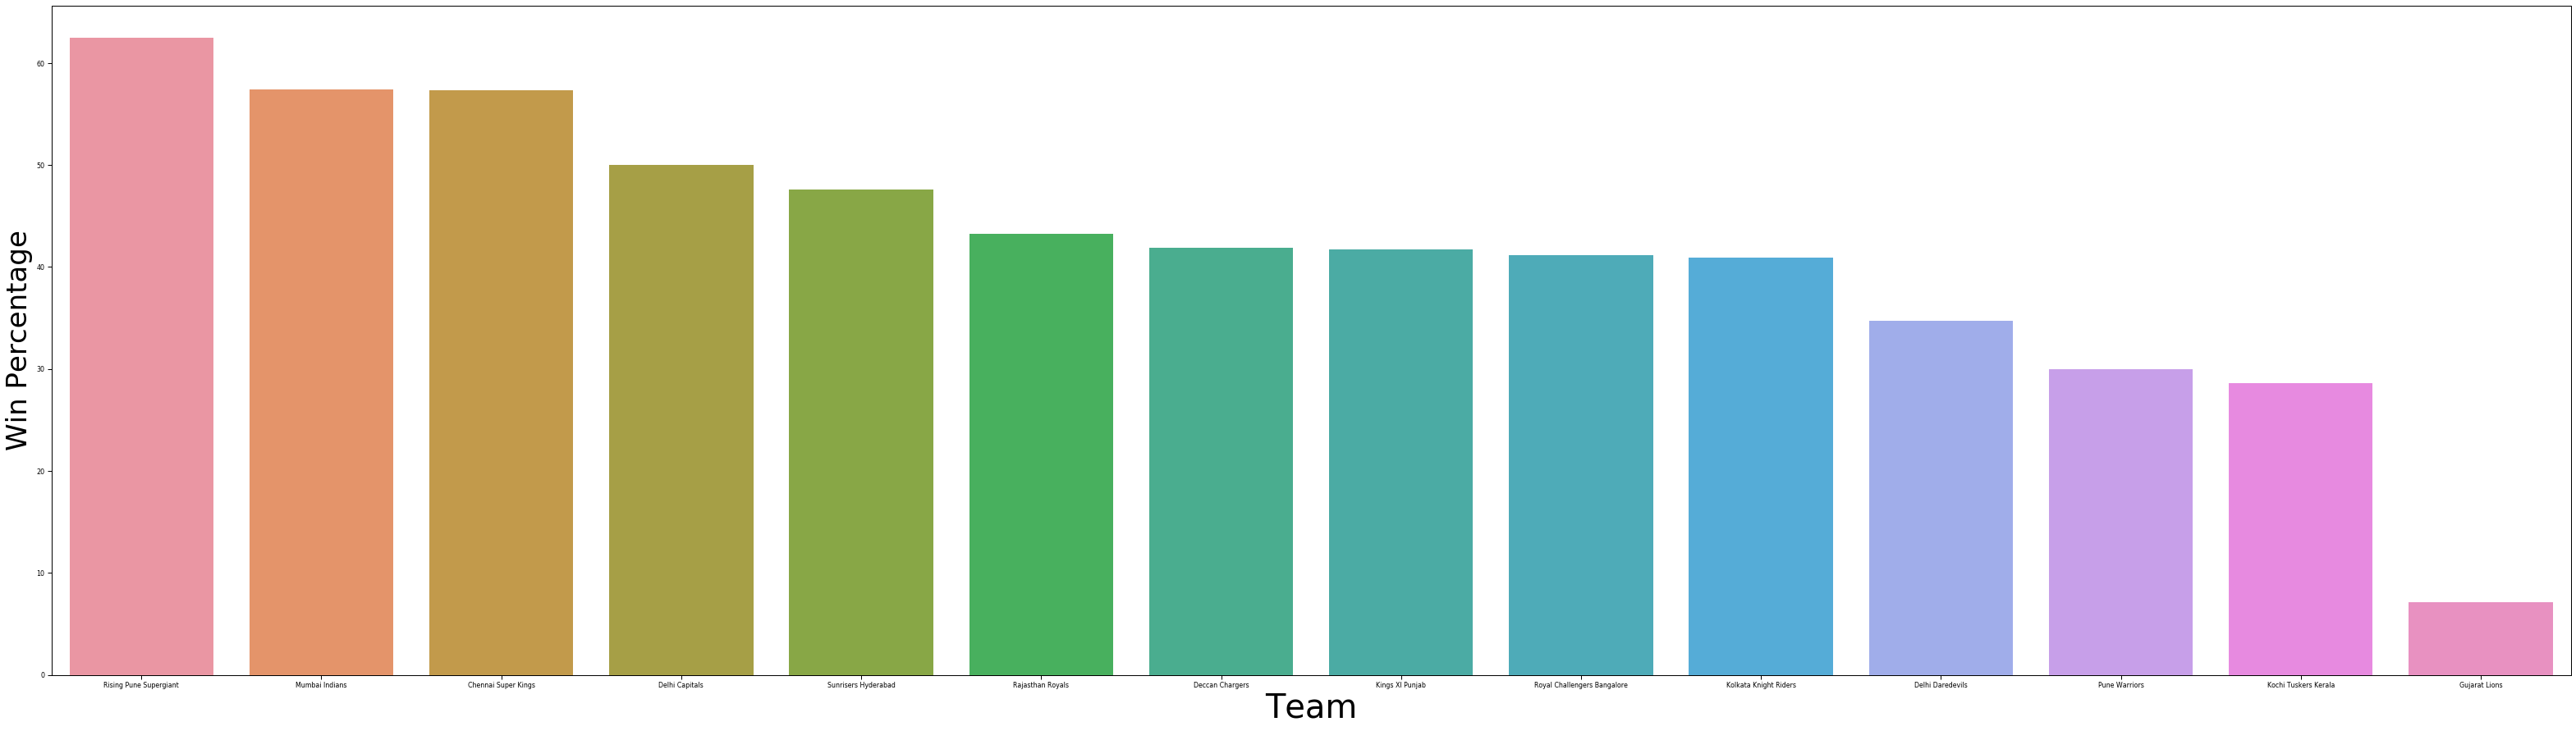

In [184]:
plt.figure(figsize=(55, 15))
sns.barplot(x = home_wins.team, y = home_wins.home_win_percentage)
plt.xlabel('Team', fontsize=40)
plt.ylabel('Win Percentage', fontsize=34)
plt.show()

From the above table and plot we came to know that Rising Pune Spergiants is the most successful team in home condition

### Matches in which toss winner is the match winner

In [95]:
match_toss_winner = matches[matches['toss_winner'] == matches['winner']]

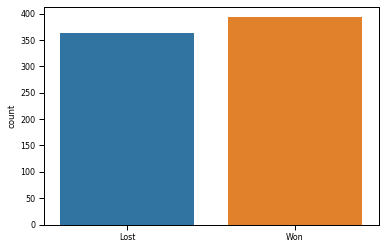

In [96]:
data = matches["toss_winner"] == matches["winner"]
data = data.apply(lambda x: "Won" if x else "Lost")
sns.countplot(x=data)
plt.show()

#### winning the toss can lead to winning the match

### Best Team

In [97]:
final_match = matches.groupby('Season').tail(1).sort_values('Season').reset_index()

In [98]:
final_match['winner'].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Sunrisers Hyderabad      1
Rajasthan Royals         1
Deccan Chargers          1
Name: winner, dtype: int64

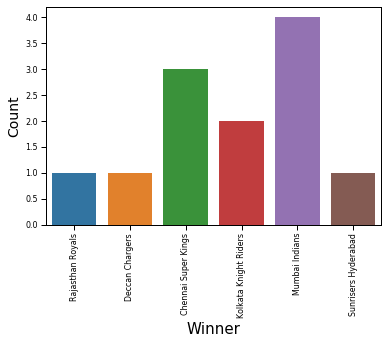

In [189]:

sns.countplot(x=final_match['winner'])
plt.xlabel('Winner', fontsize=15)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90)
plt.show()

From the above table and plot we came to know that Mumbai Indians has won maximum no of seasons that is 4 out of 12

### Top 10 player who get most man of the match award

In [117]:
man_matches = matches.groupby('player_of_match')[['id']].count()
man_matches =  man_matches.sort_values('id',ascending=False).head(10)
man_matches

,id
player_of_match,
CH Gayle,21
AB de Villiers,20
MS Dhoni,17
DA Warner,17
RG Sharma,17
YK Pathan,16
SR Watson,15
SK Raina,14
G Gambhir,13


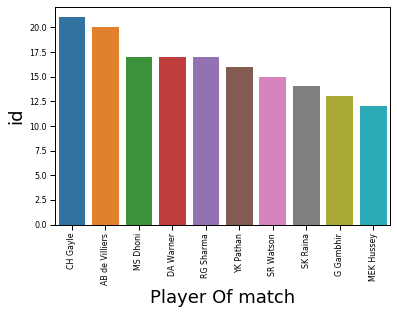

In [194]:

sns.barplot(x = man_matches.index, y = man_matches.id)
plt.xlabel('Player Of match', fontsize=18)
plt.ylabel('id', fontsize=18)
plt.xticks(rotation=90)
plt.show()

Chris Gayle is the player who became man of the match highest times

### Top 10 Batsman who scored the most runs

In [122]:
top_10 = strikerate.sort_values('total_runs',ascending=False).head(10)
top_10

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881
5,CH Gayle,4525,110,2972,41.136364,152.254374
6,MS Dhoni,4450,118,3206,37.711864,138.802246
7,RV Uthappa,4420,156,3381,28.333333,130.730553
8,AB de Villiers,4414,104,2902,42.442308,152.101999
9,G Gambhir,4219,134,3400,31.485075,124.088235


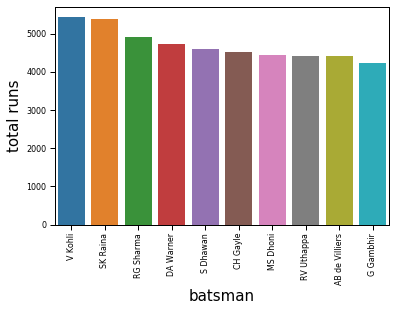

In [199]:

sns.barplot(x = 'batsman', y = 'total_runs', data = top_10)
plt.xlabel('batsman', fontsize=15)
plt.ylabel('total runs', fontsize=15)
plt.xticks(rotation=90)
plt.show()

 #### From above plot we came to know that Virat Kohli is the best batsman <font color="orange">(orange cap)

## Top 10 bowlers

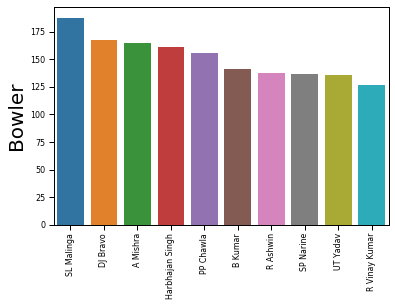

In [201]:
data = deliveries["bowler"][deliveries["player_dismissed"].notnull()].value_counts().sort_values(ascending= False)[:10]
sns.barplot(x = data.index,y = data)
plt.ylabel('Bowler', fontsize=20)
plt.xticks(rotation=90)
plt.show()

#### From the above plot we came to know that Lasith Malinga is the best bowler<font color="purple"> (Purple cap)

## Total no umpire caps for every umpires so far (Top 30)

In [153]:
umpire = matches.umpire1.value_counts() + matches.umpire2.value_counts()
umpire.sort_values(ascending=False).head(30)

S Ravi                   106.0
HDPK Dharmasena           87.0
C Shamshuddin             73.0
AK Chaudhary              58.0
SJA Taufel                55.0
M Erasmus                 54.0
Nitin Menon               42.0
BR Doctrove               42.0
RE Koertzen               41.0
CK Nandan                 41.0
VA Kulkarni               39.0
BNJ Oxenford              32.0
SK Tarapore               31.0
S Asnani                  30.0
DJ Harper                 27.0
AM Saheba                 26.0
NJ Llong                  25.0
CB Gaffaney               24.0
K Hariharan               21.0
Anil Chaudhary            21.0
RK Illingworth            19.0
JD Cloete                 17.0
BG Jerling                17.0
SS Hazare                 17.0
A Nand Kishore            16.0
O Nandan                  16.0
S Das                     15.0
K Srinath                 15.0
Bruce Oxenford            15.0
KN Ananthapadmanabhan     14.0
dtype: float64

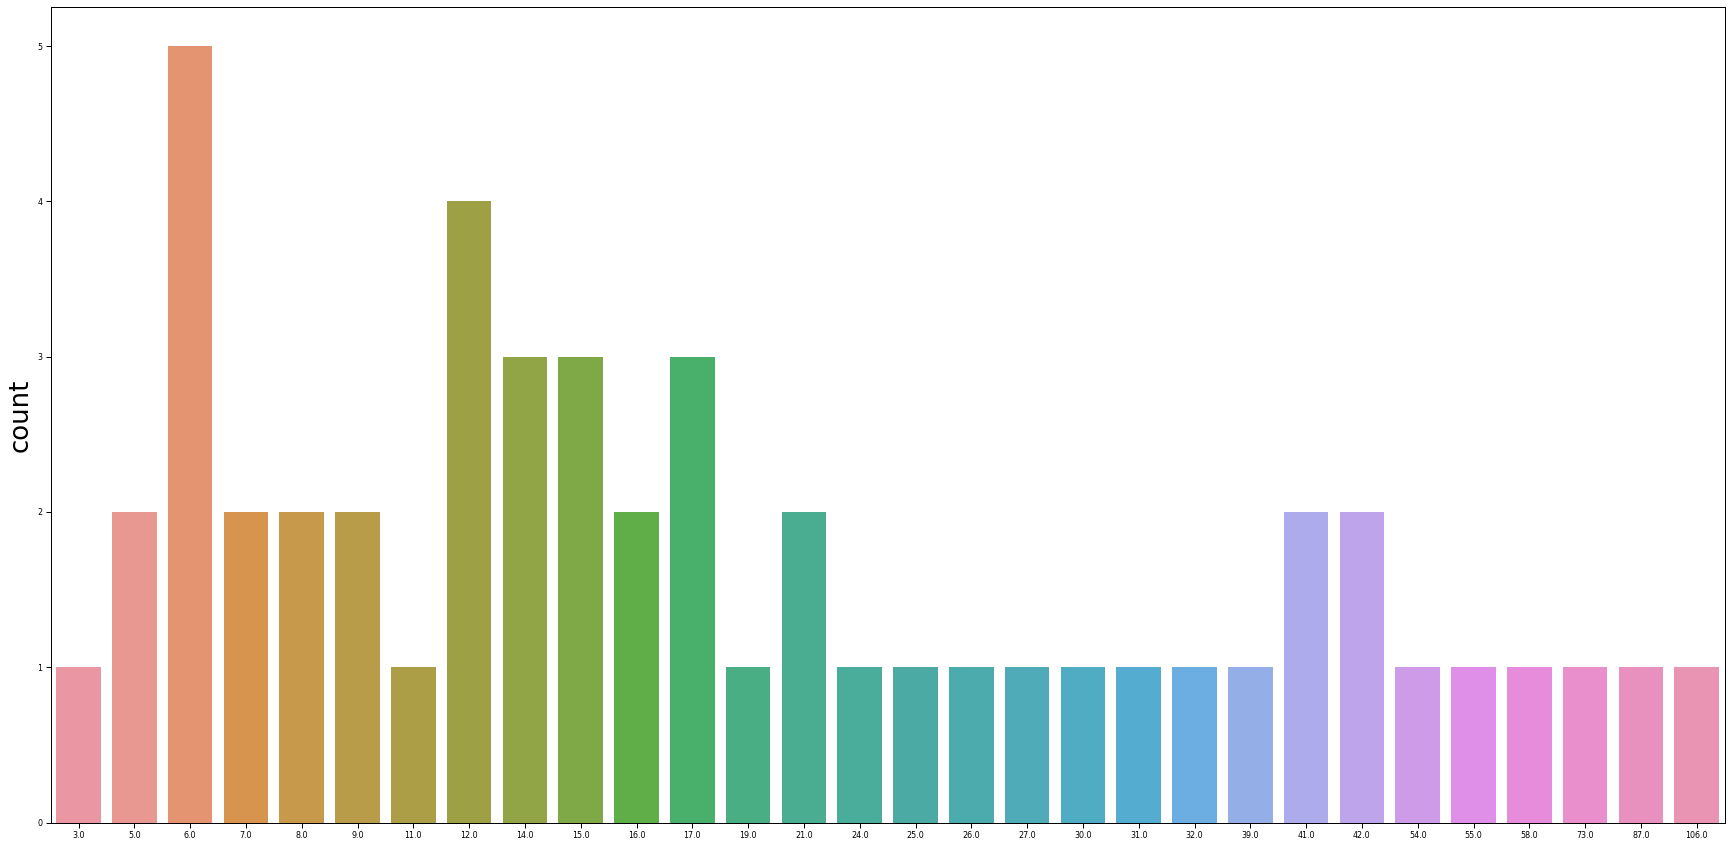

In [159]:
plt.figure(figsize = (30, 15))
sns.countplot(x = umpire)
plt.ylabel("count",fontsize=26)
plt.show()                               ##  S Ravi is the best umpire

## Players who scored more than 1000 runs

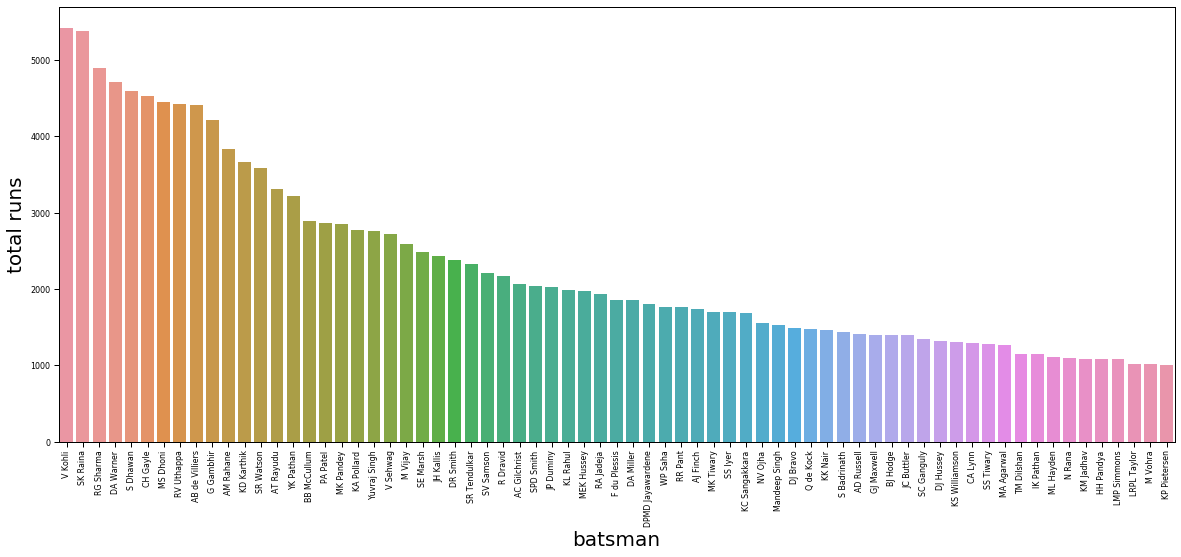

In [164]:
data = strikerate[strikerate["total_runs"]>1000]
plt.figure(figsize=(20,8))
sns.barplot(y="total_runs",x="batsman",data=data)
plt.xticks(rotation="vertical")
plt.xlabel('batsman', fontsize=20)
plt.ylabel('total runs', fontsize=20)
plt.show()

#### Virat Kohli has scored the maximum no of runs

##  Best Fielder

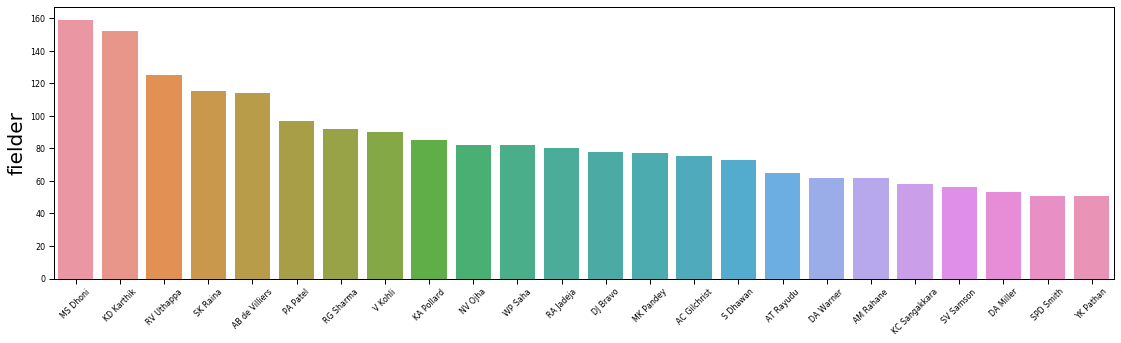

In [171]:
data = deliveries["fielder"].value_counts() 
data = data[data>50]
plt.figure(figsize=(19,5))
sns.barplot(x=data.index, y=data)
plt.xticks(rotation=45)
plt.ylabel('fielder', fontsize=20)
plt.show()

 #### MS Dhoni is the best fielder

## Number of right and left handed batsman

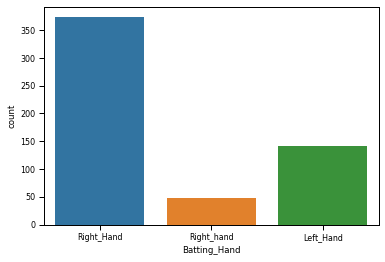

In [202]:
player["Batting_Hand"] = player["Batting_Hand"]    ## maximum no of batsman are right handed.
sns.countplot(player["Batting_Hand"])
plt.show()

### Getting Top 10 batsman with the highest number of outs

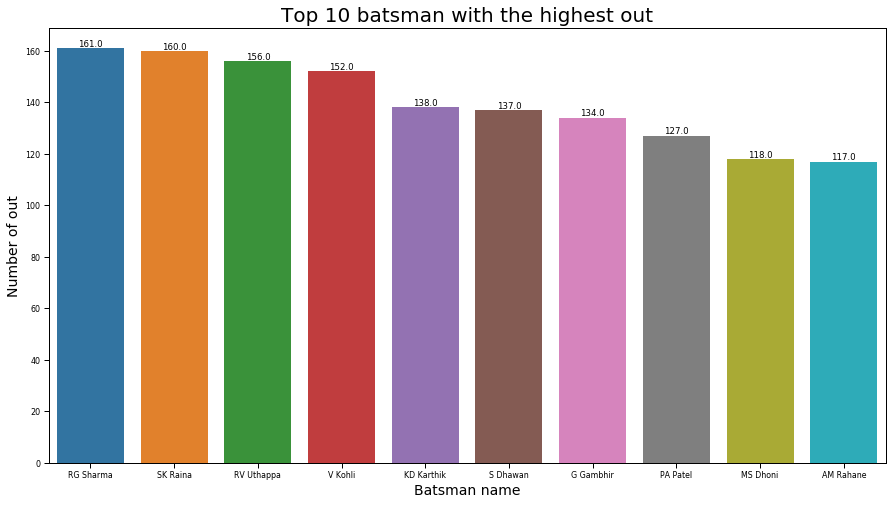

In [227]:
plt.figure(figsize=(15,8))
x = strikerate.sort_values('out', ascending=False)[:10]
ax = sns.barplot(x['batsman'], x['out'])
plt.title('Top 10 batsman with the highest out', fontsize=20)
plt.xlabel('Batsman name', fontsize=14)
plt.ylabel('Number of out', fontsize=14)

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height() + 0.75,rect.get_height(),horizontalalignment='center')

Rohit Sharma is on the top of this list with total 161 out and Suresh Raina is on second position with 160 out.

### Getting Top 10 batsman who faced the highest number of balls

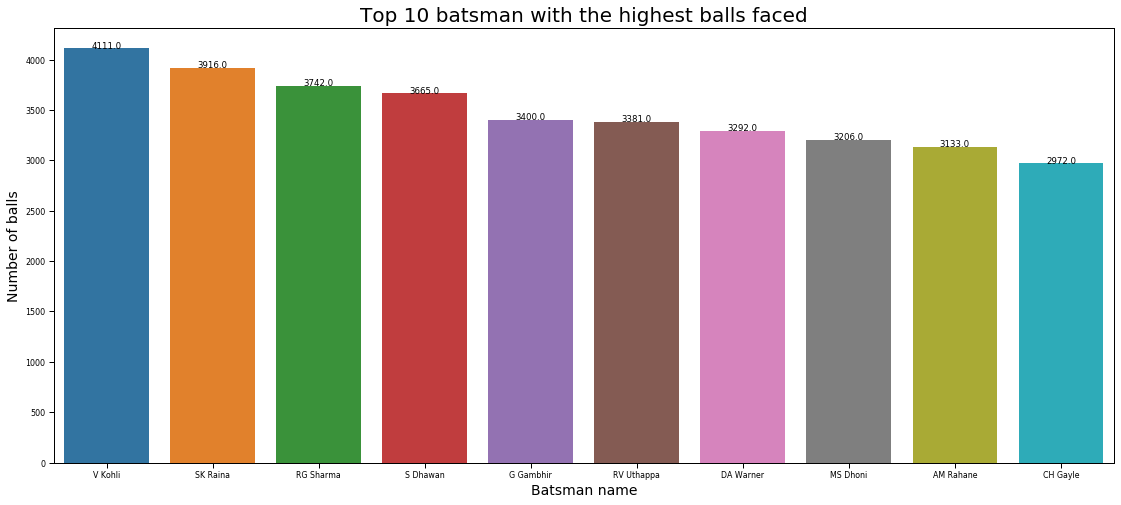

In [231]:
plt.figure(figsize=(19,8))
x = strikerate.sort_values('numberofballs', ascending=False)[:10]
ax = sns.barplot(x['batsman'], x['numberofballs'])
plt.title('Top 10 batsman with the highest balls faced', fontsize=20)
plt.xlabel('Batsman name', fontsize=14)
plt.ylabel('Number of balls', fontsize=14)

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height() + 0.75,rect.get_height(),horizontalalignment='center')

Virat Kohli is on the first position with 4111 balls and Suresh Raina is on the second position with 3916 balls


## Different bowling skills

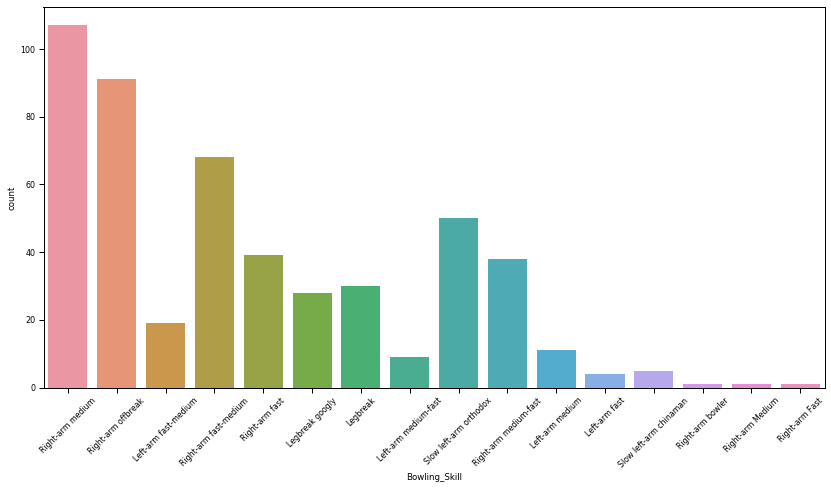

In [232]:
plt.figure(figsize = (14,7))
sns.countplot(x = player["Bowling_Skill"])
plt.xticks(rotation = 45)
plt.show()

####  Maximum bowlers uses Right arm medium bowling style.